In [ ]:
'''

Assignment 2: Car Evaluation Dataset
Dataset: Car Evaluation
Link: https://raw.githubusercontent.com/abhijeet3922/ML-Datasets/main/car_evaluation.csv
Task:
 Predict car acceptability.
 Handle missing values.
 Label encode all categorical columns.
 Standardize numeric features (if any).
 Train KNN and find best K using elbow method.

'''

In [1]:
import pandas as pd

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('car_evolution.csv')

In [3]:
df

,Unnamed: 0,buying,maint,doors,persons,lug_boots,safety,Class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...,...
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good


In [29]:
df.isnull().sum()

Unnamed: 0    0
buying        0
maint         0
doors         0
persons       0
lug_boots     0
safety        0
Class         0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boots   1728 non-null   object
 6   safety      1728 non-null   object
 7   Class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [4]:
df1 = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df1

,buying,maint,doors,persons,lug_boots,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
df1['buying'].values

array(['vhigh', 'vhigh', 'vhigh', ..., 'low', 'low', 'low'], dtype=object)

In [7]:
import numpy as np

In [8]:
np.unique(df1['buying'])

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [9]:
np.unique(df1['maint'])

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [10]:
np.unique(df1['doors'])

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
np.unique(df1['lug_boots'])

array(['big', 'med', 'small'], dtype=object)

In [12]:
np.unique(df1['persons'])

array(['2', '4', 'more'], dtype=object)

In [13]:
np.unique(df1['safety'])

array(['high', 'low', 'med'], dtype=object)

In [14]:
np.unique(df1['Class'])

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [16]:
le = LabelEncoder()

In [23]:
df1['Class'] = le.fit_transform(df1['Class'])

In [52]:
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [24]:
oe = OrdinalEncoder(categories=[['vhigh','high','med','low'],['vhigh','high','med','low'],['2', '3', '4', '5more'],['2', '4', 'more'],['big', 'med', 'small'],['high','med','low']])

In [26]:
oe.fit(df1[['buying','maint','doors','persons','lug_boots','safety']])

,categories,"[['vhigh', 'high', ...], ['vhigh', 'high', ...], ...]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [27]:
df1[['buying','maint','doors','persons','lug_boots','safety']] = oe.transform(df1[['buying','maint','doors','persons','lug_boots','safety']])

In [28]:
df1

,buying,maint,doors,persons,lug_boots,safety,Class
0,0.0,0.0,0.0,0.0,2.0,2.0,2
1,0.0,0.0,0.0,0.0,2.0,1.0,2
2,0.0,0.0,0.0,0.0,2.0,0.0,2
3,0.0,0.0,0.0,0.0,1.0,2.0,2
4,0.0,0.0,0.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...
1723,3.0,3.0,3.0,2.0,1.0,1.0,1
1724,3.0,3.0,3.0,2.0,1.0,0.0,3
1725,3.0,3.0,3.0,2.0,0.0,2.0,2
1726,3.0,3.0,3.0,2.0,0.0,1.0,1


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x = df1.iloc[:,0:6]
x.head()

,buying,maint,doors,persons,lug_boots,safety
0,0.0,0.0,0.0,0.0,2.0,2.0
1,0.0,0.0,0.0,0.0,2.0,1.0
2,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,0.0,0.0,0.0,1.0,1.0


In [34]:
y=df1['Class']

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix,classification_report

In [44]:
mae = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    mae.append(mean_absolute_error(y_test,y_pred))
print(mae)

[0.33815028901734107, 0.3554913294797688, 0.17052023121387283, 0.14739884393063585, 0.14739884393063585, 0.13005780346820808, 0.12138728323699421, 0.07514450867052024, 0.0953757225433526, 0.09826589595375723, 0.13583815028901733, 0.13872832369942195, 0.16473988439306358, 0.1531791907514451]


In [39]:
import matplotlib.pyplot as plt

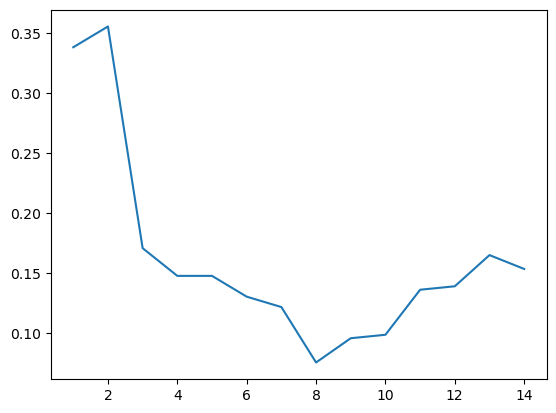

In [45]:
plt.plot(range(1,15),mae)

In [46]:
model = KNeighborsClassifier(n_neighbors=8)

In [47]:
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred = model.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred)

0.9653179190751445

In [60]:
mean_absolute_error(y_test,y_pred)

0.07514450867052024

In [51]:
import seaborn as sns

[[ 79   0   1   0]
 [  3  10   0   0]
 [  2   0 239   0]
 [  5   1   0   6]]


Text(50.722222222222214, 0.5, 'Actual')

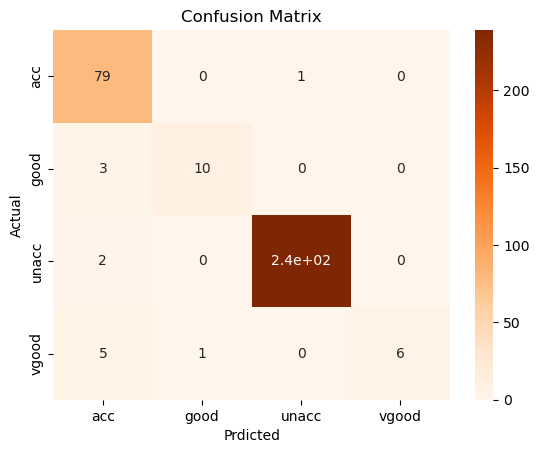

In [57]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,cmap='Oranges',annot=True,xticklabels=['acc', 'good', 'unacc', 'vgood'],yticklabels=['acc', 'good', 'unacc', 'vgood'])
plt.title('Confusion Matrix')
plt.xlabel('Prdicted')
plt.ylabel('Actual')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93        80
           1       0.91      0.77      0.83        13
           2       1.00      0.99      0.99       241
           3       1.00      0.50      0.67        12

    accuracy                           0.97       346
   macro avg       0.95      0.81      0.86       346
weighted avg       0.97      0.97      0.96       346

